In [1]:
# Transformers are a large architecture and training them is expensive and takes a lot of time.
# IN NLP we can borrow the weights of the large language models as a backbone of a new neural network built for a new task
# Text Preprocessing steps that we need to follow: -
# Tokenize the data
# Map tokens to integers
# Padding/truncating so that each inpu should be of the same length

In [2]:
# I have seen tokenization before so I am not getting deep into that but just to cover, I am going to talk about the subword tokenization
# basically lemmatization and stemmin approaches would be preffered, but we can always train a model to grt subwords given some 
# other representation of the word.

In [3]:
# Mapping the tokens to numbers: -
# we can make use of frequency appraoch to give numbers or we can simply map index values to tokens.

In [4]:
# IN padding we can use other Id's as well instead of just using 0. and trunctation can be performed by reducing the size of the vectors
# by limiting their length.

In [5]:
# We can use the models that we have already for conerting the words to numbers like from using the bert-based=case tokenizer to 
# convert the wprds in number directly., We may get 2 additional arguments in that based of the fact that every given input is surrounded
# by [cls] and [sep] tag.
# for example hello worlds would be [101,7592,2088,102], where cls and sep is 101 and 102.
# using this tokenizer we will get 2 extra outputs named, attention mask and tokec_type_ids, where in attention mask whereever there
# are 0's the algorithm will not pay attention to that.
# ** converts a dictionery to a named paramter, logits simply means that outputs that we have before we apply softmax function.

In [6]:
from transformers import AutoTokenizer
checkpoint='bert-base-uncased'

In [7]:
tokenizer=AutoTokenizer.from_pretrained(checkpoint)

C:\Users\karan\.pyenv\pyenv-win\versions\3.11.3\Lib\site-packages\huggingface_hub\file_download.py:133: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\karan\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


In [14]:
tokenizer.tokenize('hello wprld')
# we can see here that the unrecognised word is split into ## so as to maintain the continuation of the given word and 
# we are creating a subword based of the given word. For this we use the wordpiece algorithm to include this representation of 
# misspled words or unkown wprds which may also be marked as UNK tag

['hello', 'w', '##pr', '##ld']

In [15]:
tokenizer('hello world')

{'input_ids': [101, 7592, 2088, 102], 'token_type_ids': [0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1]}

In [16]:
from transformers import AutoModelForSequenceClassification

In [19]:
model=AutoModelForSequenceClassification.from_pretrained(checkpoint)
# we are getting the pretrained model here which we will finetune further so as to finetune it on a specific task.

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly i

In [22]:
model_inputs=tokenizer('hello world',return_tensors='pt')
output=model(**model_inputs)

In [23]:
output

SequenceClassifierOutput(loss=None, logits=tensor([[ 0.6342, -0.2556]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

In [24]:
model = AutoModelForSequenceClassification.from_pretrained(checkpoint,num_labels=3)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly i

In [25]:
output=model(**model_inputs)

In [26]:
output # we have been given 3 logits 

SequenceClassifierOutput(loss=None, logits=tensor([[0.1029, 0.3860, 0.2129]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

In [27]:
output.logits.detach().cpu().numpy() # we get it in a numpy array.

array([[0.1028892, 0.386023 , 0.2128563]], dtype=float32)

In [28]:
# Using multiple strings at once 
data=[
    "I like myself",
    "I hate myself too",
    "Yet I am just myself"
]
model_inputs=tokenizer(data,return_tensors='pt',padding=True,truncation=True)

In [30]:
model_inputs['input_ids']

tensor([[ 101, 1045, 2066, 2870,  102,    0,    0],
        [ 101, 1045, 5223, 2870, 2205,  102,    0],
        [ 101, 2664, 1045, 2572, 2074, 2870,  102]])

In [31]:
model_inputs['attention_mask']# 0's will be ignored as we donot want them to influence our predictions in any way.

tensor([[1, 1, 1, 1, 1, 0, 0],
        [1, 1, 1, 1, 1, 1, 0],
        [1, 1, 1, 1, 1, 1, 1]])

In [32]:
output=model(**model_inputs)

In [33]:
output

SequenceClassifierOutput(loss=None, logits=tensor([[-0.1098,  0.3541,  0.0930],
        [-0.0984,  0.2818,  0.0656],
        [-0.0709,  0.1976,  0.1880]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

In [1]:
# Transfer LEarning: -
# Wed just make use of weights that are tehre for the model and we just remove the last output layer and then train the model
# on the dataset that we have.
# Normally only new layers need to be trained.
# Given the pretrained model we just train the final layers of the model and initialized the model with the weights that we got
# and we can then use the model based of our own task.
# THe dataset should be simialr to what the model was previously trained on.
# Basically we will have a file with all the features that are given by the pretrained model and we then use those features to predict
# our model.
# Let's say that the model is used for Image Classification, but we can use the features for other tasks as well, like: -
# Object detection or neural style Transfer.
# Transfer leaning is nothing but the use of weights from one task to another task, whether those weights were finetuned or not
# Fine Tuning: -
# It is a more sepcific term, we will further tune weights in this task.
# Step 1: - Is to chop the head of the pretrained model and then define new head[layers like output and some other]
# step 2: - We train the new layer[transfer learning]
# step 3: - We unfreeze all the model and fineturn some layers
# we can undertsand more by making use of the Greedy layer wise pretraining, assume we take the hidden layer from the autoencoder[bottleneck part].
# and send that layer to another autoencoder and then train that autoencoder accordingly and finally we are able ot get the multilayer neural network.
# And at the end we can just add the final dense layer and train the entire model to get the best output.
# We just train the whole model again with a very small learning rate as our parameters are already at their best.

In [2]:
# FIne tuning for the transformers 
# we chop of the last layers and add the new layers in the end based on the new task. we then train 
# the weights for last added layer and update slightly the weights of the already pretrained body.
# we can see all th ep[ossible ways we can train the model stated below.
# FAst way to achieve the trainnig is also through the paper: - BITFIT simaple parameterr efficient finetuning for 
# Transformers.

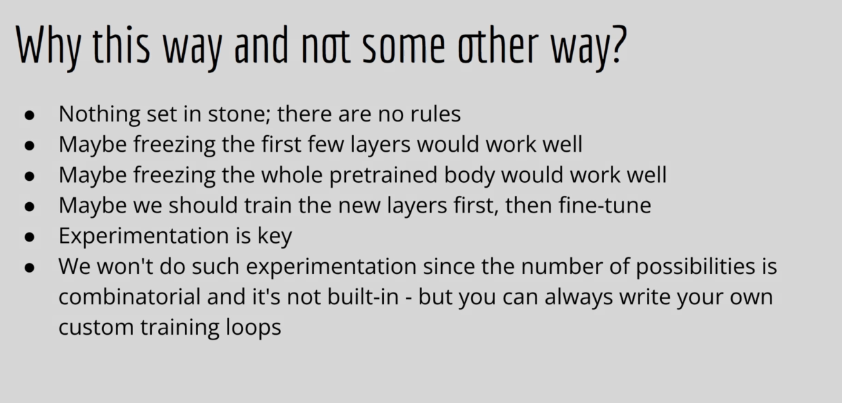

In [3]:
# The masked language model refers to the fact that it use's all the surrounding tokens to predict the target token which can be in the 
# middle as well.
# So we know that, pretrainihg tasks include mainly two tcehniques namesly casual Language model [where we predict the next word 
# given the surrounding words].[GPT models]
# and the above masked language modelling method.[bert models]
# Masked language modelling is similar to denoising teh images through the autoencoder, like where we tell the model to give us the midlle word where
# and the model tell us that.

# BERT makes use of two pretraining tasks: - Masked LM and Next sentence prediction.
# It is useful for textual entailment task: Given 2 sentences, does 1 entail the other for example: -
# Google files for its IPO and Google goes public is basically same.

In [4]:
# FINE TUNE THE MODELS: -
# WE WILL BE USING THE HIGGING FACE DATASETS LIBRARY: -
# We will make use of GLUE benchmark that is common for NLP tasks.

In [1]:
import transformers as tf 
import numpy as np 
from datasets import load_dataset

In [2]:
raw_dataset=load_dataset("glue","sst2")

Found cached dataset glue (C:/Users/karan/.cache/huggingface/datasets/glue/sst2/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad)


  0%|          | 0/3 [00:00<?, ?it/s]

In [3]:
raw_dataset
# Contents in the dataset.


DatasetDict({
    train: Dataset({
        features: ['sentence', 'label', 'idx'],
        num_rows: 67349
    })
    validation: Dataset({
        features: ['sentence', 'label', 'idx'],
        num_rows: 872
    })
    test: Dataset({
        features: ['sentence', 'label', 'idx'],
        num_rows: 1821
    })
})

In [4]:
raw_dataset['train'][999:1002]

{'sentence': ['a heartening tale of small victories ',
  'suspense , intriguing characters and bizarre bank robberies , ',
  'a gritty police thriller with all the dysfunctional family dynamics one could wish for '],
 'label': [1, 1, 1],
 'idx': [999, 1000, 1001]}

In [5]:
from transformers import AutoTokenizer

In [6]:
checkpoint='distilbert-base-uncased'
tokenizer= AutoTokenizer.from_pretrained(checkpoint)

In [7]:
tokenized_sentences = tokenizer(raw_dataset['train'][0:3]['sentence'],padding=True)
from pprint import pprint
pprint(tokenized_sentences)

{'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0],
                    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0],
                    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]],
 'input_ids': [[101,
                5342,
                2047,
                3595,
                8496,
                2013,
                1996,
                18643,
                3197,
                102,
                0,
                0,
                0,
                0,
                0],
               [101,
                3397,
                2053,
                15966,
                1010,
                2069,
                4450,
                2098,
                18201,
                2015,
                102,
                0,
                0,
                0,
                0],
               [101,
                2008,
                7459,
                2049,
                3494,
                1998,
                10639,
          

In [8]:
def tokenize_fn(batch):
    return tokenizer(batch['sentence'],truncation=True)

In [9]:
tokenized_dataset= raw_dataset.map(tokenize_fn,batched=True)
# based on the vocabulary of the LLM we are assigning number to our raw data.

Loading cached processed dataset at C:\Users\karan\.cache\huggingface\datasets\glue\sst2\1.0.0\dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad\cache-3a207232a106c6c8.arrow


Map:   0%|          | 0/872 [00:00<?, ? examples/s]

Loading cached processed dataset at C:\Users\karan\.cache\huggingface\datasets\glue\sst2\1.0.0\dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad\cache-84fa42f7a27a15a4.arrow


In [10]:
from transformers import TrainingArguments

my_trainer: This is the name of the directory where the training results will be stored. It can be any string that describes the training process.

evaluation_strategy='epoch': This argument specifies how often the model should be evaluated on the validation set during training. In this case, the model will be evaluated after each epoch of training.

save_strategy='epoch': This argument specifies how often the model should be saved during training. In this case, the model will be saved after each epoch of training.

num_train_epochs=1: This argument specifies the number of epochs to train the model for. An epoch is defined as one pass through the entire training dataset. In this case, the model will be trained for one epoch.

If I want that the evaluation be done after every 2 epochs then we can modify the given code below as: -

training_args = TrainingArguments(
    'my_trainer',
    evaluation_strategy='steps',
    eval_steps=2,
    save_strategy='epoch',
    num_train_epochs=10,
)

In [15]:
training_args = TrainingArguments(
    'my_trainer',
    evaluation_strategy='epoch',
    save_strategy='epoch',
    num_train_epochs=1,# we will increase epochs
    save_total_limit=1 
)

In [13]:
from transformers import AutoModelForSequenceClassification

In [14]:
model = AutoModelForSequenceClassification.from_pretrained(checkpoint,num_labels=2)
# we need to train the final weighst 
# this only contains the final layer that we have added on the top of the bert model and we have only 2 labels to classfiy for therefore 

C:\Users\karan\.pyenv\pyenv-win\versions\3.11.3\Lib\site-packages\huggingface_hub\file_download.py:133: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\karan\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassific

In [16]:
from torchinfo import summary

In [17]:
summary(model)

Layer (type:depth-idx)                                  Param #
DistilBertForSequenceClassification                     --
├─DistilBertModel: 1-1                                  --
│    └─Embeddings: 2-1                                  --
│    │    └─Embedding: 3-1                              23,440,896
│    │    └─Embedding: 3-2                              393,216
│    │    └─LayerNorm: 3-3                              1,536
│    │    └─Dropout: 3-4                                --
│    └─Transformer: 2-2                                 --
│    │    └─ModuleList: 3-5                             42,527,232
├─Linear: 1-2                                           590,592
├─Linear: 1-3                                           1,538
├─Dropout: 1-4                                          --
Total params: 66,955,010
Trainable params: 66,955,010
Non-trainable params: 0

In [18]:
model

DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
 

In [19]:
params_before =[]
for name,p in model.named_parameters():
    params_before.append(p.detach().cpu().numpy())

In [21]:
from transformers import Trainer

In [22]:
from datasets import load_metric

In [23]:
metric = load_metric("glue","sst2")

C:\Users\karan\AppData\Local\Temp\ipykernel_38800\4171972349.py:1: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  metric = load_metric("glue","sst2")


In [25]:
metric.compute(predictions=[1,0,1],references=[1,0,0])# this is just a dummy list so as to know what we get back
# we get back the accuracy as the metrics, if we want our own functions we would also need a dictionery.

{'accuracy': 0.6666666666666666}

In [32]:
def compute_metrics(logits_and_labels):# tuple containg the logits and labels
    logits,labels = logits_and_labels
    predictions=np.argmax(logits,axis=-1)
    return metric.compute(predictions=predictions,references=labels) 

In [33]:
trainer1 = Trainer(
    model,
    training_args,# it defines the number of epochs and 
    train_dataset=tokenized_dataset['train'],
    eval_dataset=tokenized_dataset['validation'],
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)

In [34]:
trainer1.train()

C:\Users\karan\.pyenv\pyenv-win\versions\3.11.3\Lib\site-packages\transformers\optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy
1,0.170600,0.401168,0.893349


TrainOutput(global_step=8419, training_loss=0.14743791383778854, metrics={'train_runtime': 4341.2491, 'train_samples_per_second': 15.514, 'train_steps_per_second': 1.939, 'total_flos': 518400815624736.0, 'train_loss': 0.14743791383778854, 'epoch': 1.0})

In [35]:
# validation loss is more than the training loss therefore the model is overfitted.
trainer1.save_model('saved_model')
# This will contain the model and the files for tokenizer and everything to that 

In [36]:
from transformers import pipeline

In [38]:
newmodel=pipeline('text-classification',model='saved_model')# it will load our model

In [39]:
newmodel('This movie is great')

[{'label': 'LABEL_1', 'score': 0.9994674324989319}]

In [40]:
newmodel('this movie sucks')

[{'label': 'LABEL_0', 'score': 0.9971684813499451}]

In [41]:
newmodel('this movie is not great')

[{'label': 'LABEL_0', 'score': 0.9970937967300415}]

In [42]:
params_after =[]
for name,p in model.named_parameters():
    params_after.append(p.detach().cpu().numpy())
# we have done this to check if the weights have been updated after the training of the 
# model.

# Sentiment Analysis Custom Dataset: -

In [43]:
import pandas as pd 
data = pd.read_csv('Tweets.csv')

In [44]:
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [45]:
df = data[['airline_sentiment','text']]

In [47]:
target_map = {
    'positive':0,
    'negative':1,
    'neutral':2,
}
df['airline_sentiment']=df['airline_sentiment'].map(target_map)

C:\Users\karan\AppData\Local\Temp\ipykernel_38800\272625419.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['airline_sentiment']=df['airline_sentiment'].map(target_map)


In [49]:
df.columns=['labels','sentence'] 

In [51]:
df.to_csv('data.csv',index=None)

In [52]:
new_dataset = load_dataset('csv',data_files='data.csv')
# loading this dataset in hugging face format 

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Dataset csv downloaded and prepared to C:/Users/karan/.cache/huggingface/datasets/csv/default-35441d4cce41751b/0.0.0/eea64c71ca8b46dd3f537ed218fc9bf495d5707789152eb2764f5c78fa66d59d. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

In [53]:
split = new_dataset['train'].train_test_split(test_size=0.3,seed=42)

In [54]:
split

DatasetDict({
    train: Dataset({
        features: ['labels', 'sentence'],
        num_rows: 10248
    })
    test: Dataset({
        features: ['labels', 'sentence'],
        num_rows: 4392
    })
})

In [55]:
# we can also load multiple datafiles from the load_dataset method as shown below.

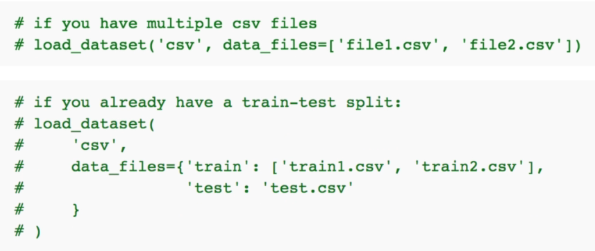

In [56]:
# we will be using the same model as before which is distilbert-base-uncased.
# we already have the associated tokenizer from above.
# and we will be using the same tokenize_fn as above.

'distilbert-base-uncased'

In [59]:
tokenized_dataset=split.map(tokenize_fn,batched=True) # tokenizing the new data 
# bacthing just help with processing faster whereas, when batched= False we will process each sentence

Map:   0%|          | 0/10248 [00:00<?, ? examples/s]

Map:   0%|          | 0/4392 [00:00<?, ? examples/s]

In [60]:
model = AutoModelForSequenceClassification.from_pretrained(checkpoint,num_labels=3)

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_layer_norm.bias', 'vocab_layer_norm.weight', 'vocab_projector.bias', 'vocab_transform.weight', 'vocab_transform.bias']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.we

In [64]:
training_args1=TrainingArguments(
    output_dir='my_trainer2',
    num_train_epochs=3,
    evaluation_strategy ='epoch',
    save_strategy='epoch',
)

In [81]:
from sklearn.metrics import f1_score,accuracy_score

In [66]:
def compute_metrics(logits_and_labels):# We are definnig this again because now we have a custom daraset 
    logits,labels=logits_and_labels
    predictions=np.argmax(logits,axis=-1)
    acc=np.mean(predictions==labels) # calculating teh accuracy.
    f1=f1_score(labels,predictions,average='macro')
    return {'accuracy':acc,'f1':f1} 

In [67]:
trainer2 = Trainer(
    model,
    training_args1,
    train_dataset=tokenized_dataset['train'],
    eval_dataset=tokenized_dataset['test'],
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)

In [68]:
trainer2.train()
# training these models take up a lot of time.

C:\Users\karan\.pyenv\pyenv-win\versions\3.11.3\Lib\site-packages\transformers\optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.482500,0.447206,0.829463,0.775894
2,0.329800,0.594081,0.845401,0.788963
3,0.191000,0.697831,0.841530,0.787220


TrainOutput(global_step=3843, training_loss=0.3404160369785695, metrics={'train_runtime': 3517.4833, 'train_samples_per_second': 8.74, 'train_steps_per_second': 1.093, 'total_flos': 334314349864272.0, 'train_loss': 0.3404160369785695, 'epoch': 3.0})

In [69]:
# we are going to access the second model as we have saved all the models we can access the second model as well

In [74]:
ls my_trainer2

 Volume in drive C is Acer
 Volume Serial Number is FC91-39CF

 Directory of C:\Users\karan\Documents\NLP\NLp-UDEMy - LAZY PROGRAMMER\my_trainer2

12-07-2023  16:05    <DIR>          .
12-07-2023  16:43    <DIR>          ..
12-07-2023  15:30    <DIR>          checkpoint-1281
12-07-2023  15:50    <DIR>          checkpoint-2562
12-07-2023  16:05    <DIR>          checkpoint-3843
12-07-2023  15:07    <DIR>          runs
               0 File(s)              0 bytes
               6 Dir(s)  89,074,143,232 bytes free


In [75]:
saved_model1=pipeline('text-classification',model='my_trainer2/checkpoint-2562')

In [76]:
test_pred = saved_model1(split['test']['sentence']) # getting all the predictions on the test data 

In [79]:
test_pred[:5]
# there is a problem with the fine tune models that they are generic name based that's 
# why we need to save the above dataframe with sentences and labels format, we can overcome this 
# by making use of Autoconfig from transformers module, and we can map our labels with 
# by changing the predefined labels in autoconfig.
# in the model defination we need to pass in the config argument with teh changed autoconfig argument
# and this will basically allow us to get the positive or negative or neutral instaed of Label_0,Label_1.

[{'label': 'LABEL_0', 'score': 0.9801254868507385},
 {'label': 'LABEL_0', 'score': 0.9736462235450745},
 {'label': 'LABEL_1', 'score': 0.828781247138977},
 {'label': 'LABEL_0', 'score': 0.9511585831642151},
 {'label': 'LABEL_2', 'score': 0.4257616400718689}]

In [80]:
def get_label(d):
    return int(d['label'].split('_')[1])
test_pred=[get_label(d) for d in test_pred]

In [84]:
print('acc:',accuracy_score(split['test']['labels'],test_pred))

acc: 0.8454007285974499


# Multiple Input Sentences [Textual Entailment]

In [4]:
# we can train the existing transformer to understand multiple input sentences, concatenated into the same input.
# we can achive this using our Bert model as it is trained on next sentence prediction task also.
# it basically menas given two sentence, the model should be able to tell us whether the next sentence follows the first or not.
# IN bert we use special format, as the output starts with the [CLS] token and then add a [Sep] token and at the end we again add a Sep token at end.
# for Example [CLS] This is the first Sentence[SEP] This is the second Sentence[SEP]
# Textual entailment simply means that the sentences should make sense, given the first sentence the second senrende should make sense.
# For example bob buys a car, means that bob owns a car represent textual entailment, whereas bob purchased cheese and bob doesn't have 
# cheese entails that the fisrt sentence and second sentences are bot not the same.
# and the output will be based on 0 and 1.
# Token_type_ids generated by the bert model tells us the first sentence by showing it with 0's and the secind sentence by showing it 
# it with 1's

In [24]:
from datasets import load_dataset
import numpy as np

In [49]:
raw_dataset=load_dataset("glue","rte")

Found cached dataset glue (C:/Users/karan/.cache/huggingface/datasets/glue/rte/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad)


  0%|          | 0/3 [00:00<?, ?it/s]

In [50]:
raw_dataset

DatasetDict({
    train: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx'],
        num_rows: 2490
    })
    validation: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx'],
        num_rows: 277
    })
    test: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx'],
        num_rows: 3000
    })
})

In [15]:
raw_dataset['train']['sentence1'][:5]

['No Weapons of Mass Destruction Found in Iraq Yet.',
 'A place of sorrow, after Pope John Paul II died, became a place of celebration, as Roman Catholic faithful gathered in downtown Chicago to mark the installation of new Pope Benedict XVI.',
 'Herceptin was already approved to treat the sickest breast cancer patients, and the company said, Monday, it will discuss with federal regulators the possibility of prescribing the drug for more breast cancer patients.',
 'Judie Vivian, chief executive at ProMedica, a medical service company that helps sustain the 2-year-old Vietnam Heart Institute in Ho Chi Minh City (formerly Saigon), said that so far about 1,500 children have received treatment.',
 "A man is due in court later charged with the murder 26 years ago of a teenager whose case was the first to be featured on BBC One's Crimewatch. Colette Aram, 16, was walking to her boyfriend's house in Keyworth, Nottinghamshire, on 30 October 1983 when she disappeared. Her body was later found i

In [16]:
raw_dataset['train']['sentence2'][:5]

['Weapons of Mass Destruction Found in Iraq.',
 'Pope Benedict XVI is the new leader of the Roman Catholic Church.',
 'Herceptin can be used to treat breast cancer.',
 'The previous name of Ho Chi Minh City was Saigon.',
 'Paul Stewart Hutchinson is accused of having stabbed a girl.']

In [18]:
raw_dataset['train']['label'][:5]
# this means that 1 represent the textual entailment whereas the 0 represent that the sentence is 
# not textually entailed.

[1, 0, 0, 0, 1]

In [19]:
checkpoint="distilbert-base-cased"

In [20]:
from transformers import AutoTokenizer,AutoModelForSequenceClassification,Trainer,TrainingArguments

In [21]:
tokenizer=AutoTokenizer.from_pretrained(checkpoint)

C:\Users\karan\.pyenv\pyenv-win\versions\3.11.3\Lib\site-packages\huggingface_hub\file_download.py:133: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\karan\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


In [22]:
tokenizer(
    raw_dataset['train']['sentence1'][0],
    raw_dataset['train']['sentence2'][0]  
)

{'input_ids': [101, 1302, 20263, 1104, 8718, 14177, 17993, 17107, 1107, 5008, 6355, 119, 102, 20263, 1104, 8718, 14177, 17993, 17107, 1107, 5008, 119, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [23]:
model = AutoModelForSequenceClassification.from_pretrained(checkpoint,num_labels=2)


Some weights of the model checkpoint at distilbert-base-cased were not used when initializing DistilBertForSequenceClassification: ['vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_transform.weight', 'vocab_layer_norm.bias', 'vocab_projector.weight', 'vocab_projector.bias']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-cased and are newly initialized: ['classifier.bias', 'pre_classifier.bias', 'pre_classifier.w

In [25]:
training_args=TrainingArguments(
    output_dir='Textual_entailment',
    evaluation_strategy='epoch',
    save_strategy='epoch',
    num_train_epochs=2,
    per_device_eval_batch_size=64,
    per_device_train_batch_size=16,
    logging_steps=150, # as this dataset is small
)

In [26]:
from datasets import load_metric

In [27]:
metric = load_metric('glue','rte')

C:\Users\karan\AppData\Local\Temp\ipykernel_17360\1350811193.py:1: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  metric = load_metric('glue','rte')


In [29]:
from sklearn.metrics import f1_score

In [30]:
def compute_metrics(logits_and_labels):
    logits,labels=logits_and_labels
    predictions=np.argmax(logits,axis=-1)
    acc=np.mean(predictions==labels)
    f1=f1_score(labels,predictions)
    return {'accuracy':acc,"f1":f1}

In [31]:
def tokenize_fn(batch):
    return tokenizer(batch['sentence1'],batch['sentence2'],truncation=True)

In [32]:
tokenized_dataset=raw_dataset.map(tokenize_fn,batched=True)

Map:   0%|          | 0/2490 [00:00<?, ? examples/s]

Map:   0%|          | 0/277 [00:00<?, ? examples/s]

Map:   0%|          | 0/3000 [00:00<?, ? examples/s]

In [33]:
trainer3=Trainer(
    model,
    training_args,
    train_dataset=tokenized_dataset['train'],
    eval_dataset=tokenized_dataset['validation'],
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

In [34]:
trainer3.train()
# training is for lkess epochs as this take a lot of time for training.

C:\Users\karan\.pyenv\pyenv-win\versions\3.11.3\Lib\site-packages\transformers\optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
You're using a DistilBertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.695600,0.701732,0.494585,0.648241
2,0.641000,0.703821,0.563177,0.466960


TrainOutput(global_step=312, training_loss=0.666349314726316, metrics={'train_runtime': 1139.6466, 'train_samples_per_second': 4.37, 'train_steps_per_second': 0.274, 'total_flos': 216454834108560.0, 'train_loss': 0.666349314726316, 'epoch': 2.0})

In [36]:
# we donot ahve very high accuracy as we need to train the data more but as of now in order to save the 
# memory and copmutational power I am movinga haead.
from transformers import pipeline 

In [38]:
saved_model = pipeline('text-classification',model='Textual_entailment/checkpoint-312/')

WARNING[XFORMERS]: xFormers can't load C++/CUDA extensions. xFormers was built for:
    PyTorch 2.0.1+cu118 with CUDA 1108 (you have 2.0.1+cpu)
    Python  3.11.3 (you have 3.11.3)
  Please reinstall xformers (see https://github.com/facebookresearch/xformers#installing-xformers)
  Memory-efficient attention, SwiGLU, sparse and more won't be available.
  Set XFORMERS_MORE_DETAILS=1 for more details


In [52]:
test_pred = saved_model(raw_dataset['validation']['sentence1'],raw_dataset['test']['sentence2'])

Ignoring args : (['Shukla is related to Mangla.', 'Authorities in Brazil hold 200 people as hostage.', 'An interior ministry worker was killed by a mercenary group.', 'Derek Plumbly resides in Egypt.', 'Botswana is a business partner of De Beers.', 'Strida elected to parliament.', 'Mel Sembler represents the U.S.', 'Russian parliament closes NGOs.', 'Philip Ruddock has been condemned to the death penalty.', 'Chemical plants and oil refineries are located in New Jersey.', 'Greater Johnstown-Cambria County Convention and Visitors Bureau funded two volunteer fire companies.', 'Ali Al-Timimi is imprisoned in Virginia.', 'Robert Tuttle works for the BBC.', 'Saddam Hussein accepted exile.', 'Nguyen is a lawyer.', "India's Meteorological Department operates from Indonesia.", 'United won the Champions League.', 'First Automotive Works Group is based in China.', 'JD Edwards belongs to PeopleSoft.', 'State and federal agencies took part in a chemical attack.', 'Mauricio Pineda was killed in Mora

In [53]:
from sklearn.metrics import accuracy_score

In [54]:
def get_label(d):
    return int(d['label'].split('_')[1])
test_pred=[get_label(d) for d in test_pred]

In [55]:
print(accuracy_score(raw_dataset['validation']['label'],test_pred))

0.51985559566787


In [56]:
# we are uisng validation as for soem reason the test have -1 as all the labels in its dataset.

# End